In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/dataset"

In [ ]:
import os
sample_path = os.path.join(data_path, "beaming-face", "0.png")

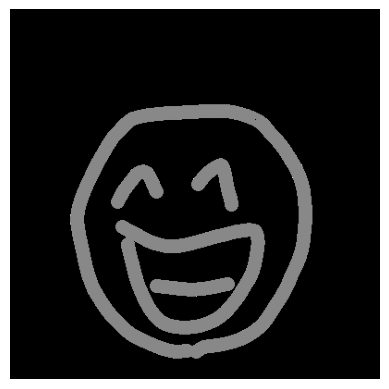

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

sample_image = Image.open(sample_path).convert('L')
plt.imshow(sample_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
sample_image.size

(400, 400)

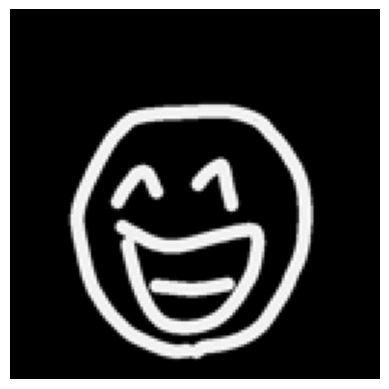

In [ ]:
sample_image = sample_image.resize((128, 128))
plt.imshow(sample_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_size = 64
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

In [ ]:
train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    class_mode="categorical",
    subset="training",
    batch_size=batch_size,
    shuffle = True)

Found 432 images belonging to 18 classes.


In [ ]:
val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    batch_size=batch_size)

Found 108 images belonging to 18 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

In [ ]:
def CNN(input_shape = (64,64,1), num_classes = train_gen.num_classes):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(GlobalAveragePooling2D())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [ ]:
model = CNN()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, epochs=50, validation_data=val_gen, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 161s 11s/step - accuracy: 0.0334 - loss: 2.8906 - val_accuracy: 0.0556 - val_loss: 2.8886
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 504ms/step - accuracy: 0.0451 - loss: 2.8921 - val_accuracy: 0.0648 - val_loss: 2.8867
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.0567 - loss: 2.8863 - val_accuracy: 0.0556 - val_loss: 2.8833
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 603ms/step - accuracy: 0.0917 - loss: 2.8767 - val_accuracy: 0.0556 - val_loss: 2.8757
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.0471 - loss: 2.8797 - val_accuracy: 0.0833 - val_loss: 2.8617
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 790ms/step - accuracy: 0.0729 - loss: 2.8613 - val_accuracy: 0.0648 - val_loss: 2.8316
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 549ms/step - accuracy: 0.0909 - loss: 2.8389 - val_accuracy: 0.1852 - val_loss: 2.7616
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 488ms/step - accuracy: 0.0834 - loss: 2.7450 - val_accuracy: 

In [ ]:
model.evaluate(val_gen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.3632 - loss: 1.9505


[1.9062165021896362, 0.3611111044883728]